# 아파트 경매가격 데이터 분석 EDA

> 투빅스 1주차 과제 - 조상연
>
> DACON 3회 아파트 경매가격 예측 모델링 대회 데이터 기반

## 요구사항
- A. 아래를 포함한 전처리 및 EDA 과정을 진행

    1. 결측값이 있는 모든 열을 없애주세요
    2. 모든 연속형 변수 간의 상관관계를 Heatmap을 통해 확인
    3. 모든 연속형 변수의 분포를 Histogram으로 확인
    4. Target 변수와 관련 있거나, 유의미한 Insight를 얻을 수 있는 시각화를 5개 이상 해주세요 (subplot활용)


- B. 1-4에서 도출된 시각화 + 번뜩이는 Insight를 바탕으로 유의미한 Feature를 10개 이상 생성해 주세요 


## 데이터 명세

|Column Name| DataType| Description|
|---|---|---|
|`Auction_key`| int64 |경매 아파트 고유 키값|
|`Auction_class`| object |경매구분  강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행|
|`Bid_class`| object |입찰구분(일반/개별/일괄)|
|`Claim_price`| int64 |경매 신청인의 청구 금액|
|`Appraisal_company`| object |감정사|
|`Appraisal_date`| datetime64[ns] |감정일자|
|`Auction_count`| int64 |총경매횟수|
|`Auction_miscarriage_count`| int64 |총유찰횟수|
|`Total_land_gross_area`| float64 |총토지전체면적(㎡)|
|`Total_land_real_area`| float64 |총토지실면적(㎡)|
|`Total_land_auction_area`| float64 |총토지경매면적(㎡)|
|`Total_building_area`| float64 |총건물면적(㎡)|
|`Total_building_auction_area`| float64 |총건물경매면적(㎡)|
|`Total_appraisal_price`| int64 |총감정가|
|`Minimum_sales_price`| int64 |최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액|
|`First_auction_date`| datetime64[ns] |최초경매일|
|`Final_auction_date`| datetime64[ns] |최종경매일|
|`Final_result`| object |최종결과|
|`Creditor`| object |채권자, 경매 신청인|
|`addr_do`| object |주소_시도|
|`addr_si`| object |주소_시군구|
|`addr_dong`| object |주소_읍면동|
|`addr_li`| object |주소_리|
|`addr_san`| object |주소_산번지 여부(Y/N)|
|`addr_bunji1`| float64 |주소_번지1|
|`addr_bunji2`| float64 |주소_번지2|
|`addr_etc`| object |주소_기타주소|
|`Apartment_usage`| object |건물(토지)의 대표 용도|
|`Preserve_regist_date`| object |보존등기일, 건물을 신축하고 처음으로 등기|
|`Total_floor`| int64 |총층수|
|`Current_floor`| int64 |현재층수|
|`Specific`| object |기타_특이사항|
|`Share_auction_YorN`| object |지분경매 여부(Y/N), 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)|
|`road_name`| object |도로명주소_도로명|
|`road_bunji1`| float64 |도로명주소_번지1|
|`road_bunji2`| float64 |도로명주소_번지2|
|`Close_date`| object |종국일자|
|`Close_result`| object |종국결과, 낙찰과 배당의 차이 :  경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.|
|`point.y`| float64 |위도|
|`point.x`| float64 |경도|
|`Hammer_price`| int64 |낙찰가|

In [2]:
# !pip install pandas="1.0.0"

In [2]:
# 패키지 import
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore') # Warning Message 안보이게

/Users/josang-yeon/tobigs/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import matplotlib as mpl
# 고해상도 Plot을 위해 DPI 조절
mpl.rcParams['figure.dpi']= 150

In [4]:
#parse_dates 인자를 통해 datetime으로 변환, 단 변환 불가시 object로 반환
df = pd.read_csv('Auction_master_train.csv',parse_dates=[
    'Appraisal_date', 'First_auction_date', 'Final_auction_date','Preserve_regist_date', 'Close_date'])

## A. EDA 진행

## 1) 결측값이 있는 열 제거

In [5]:
df.dropna(axis=1,inplace=True)

## 2) 모든 연속형 변수 간의 상관관계를 Heatmap을 통해 확인

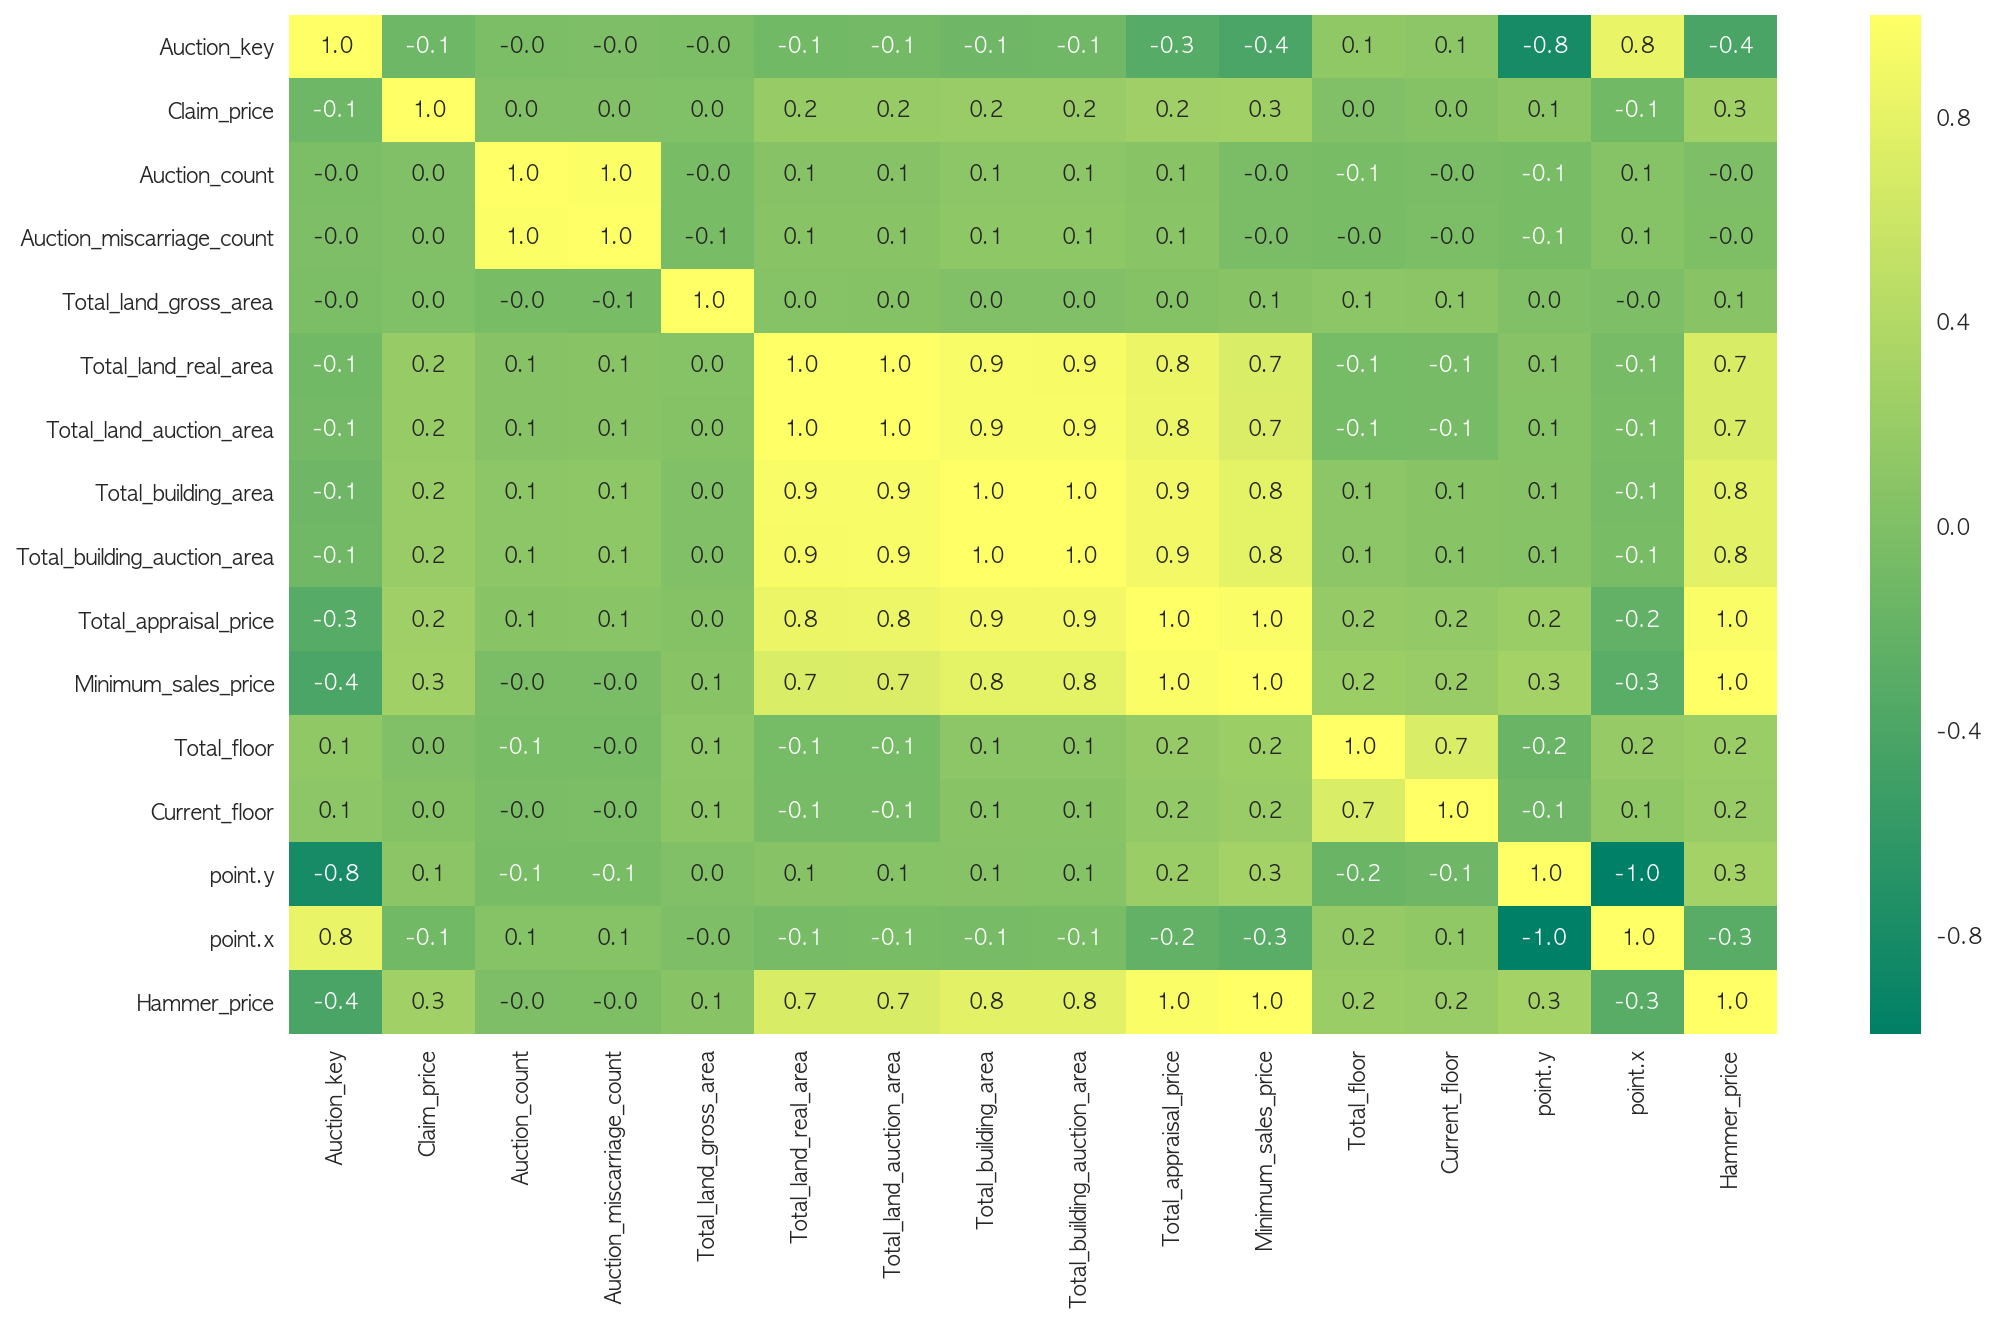

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='summer',annot=True,fmt="0.1f")
plt.show()

## 3) 모든 연속형 변수의 분포를 Histogram으로 확인

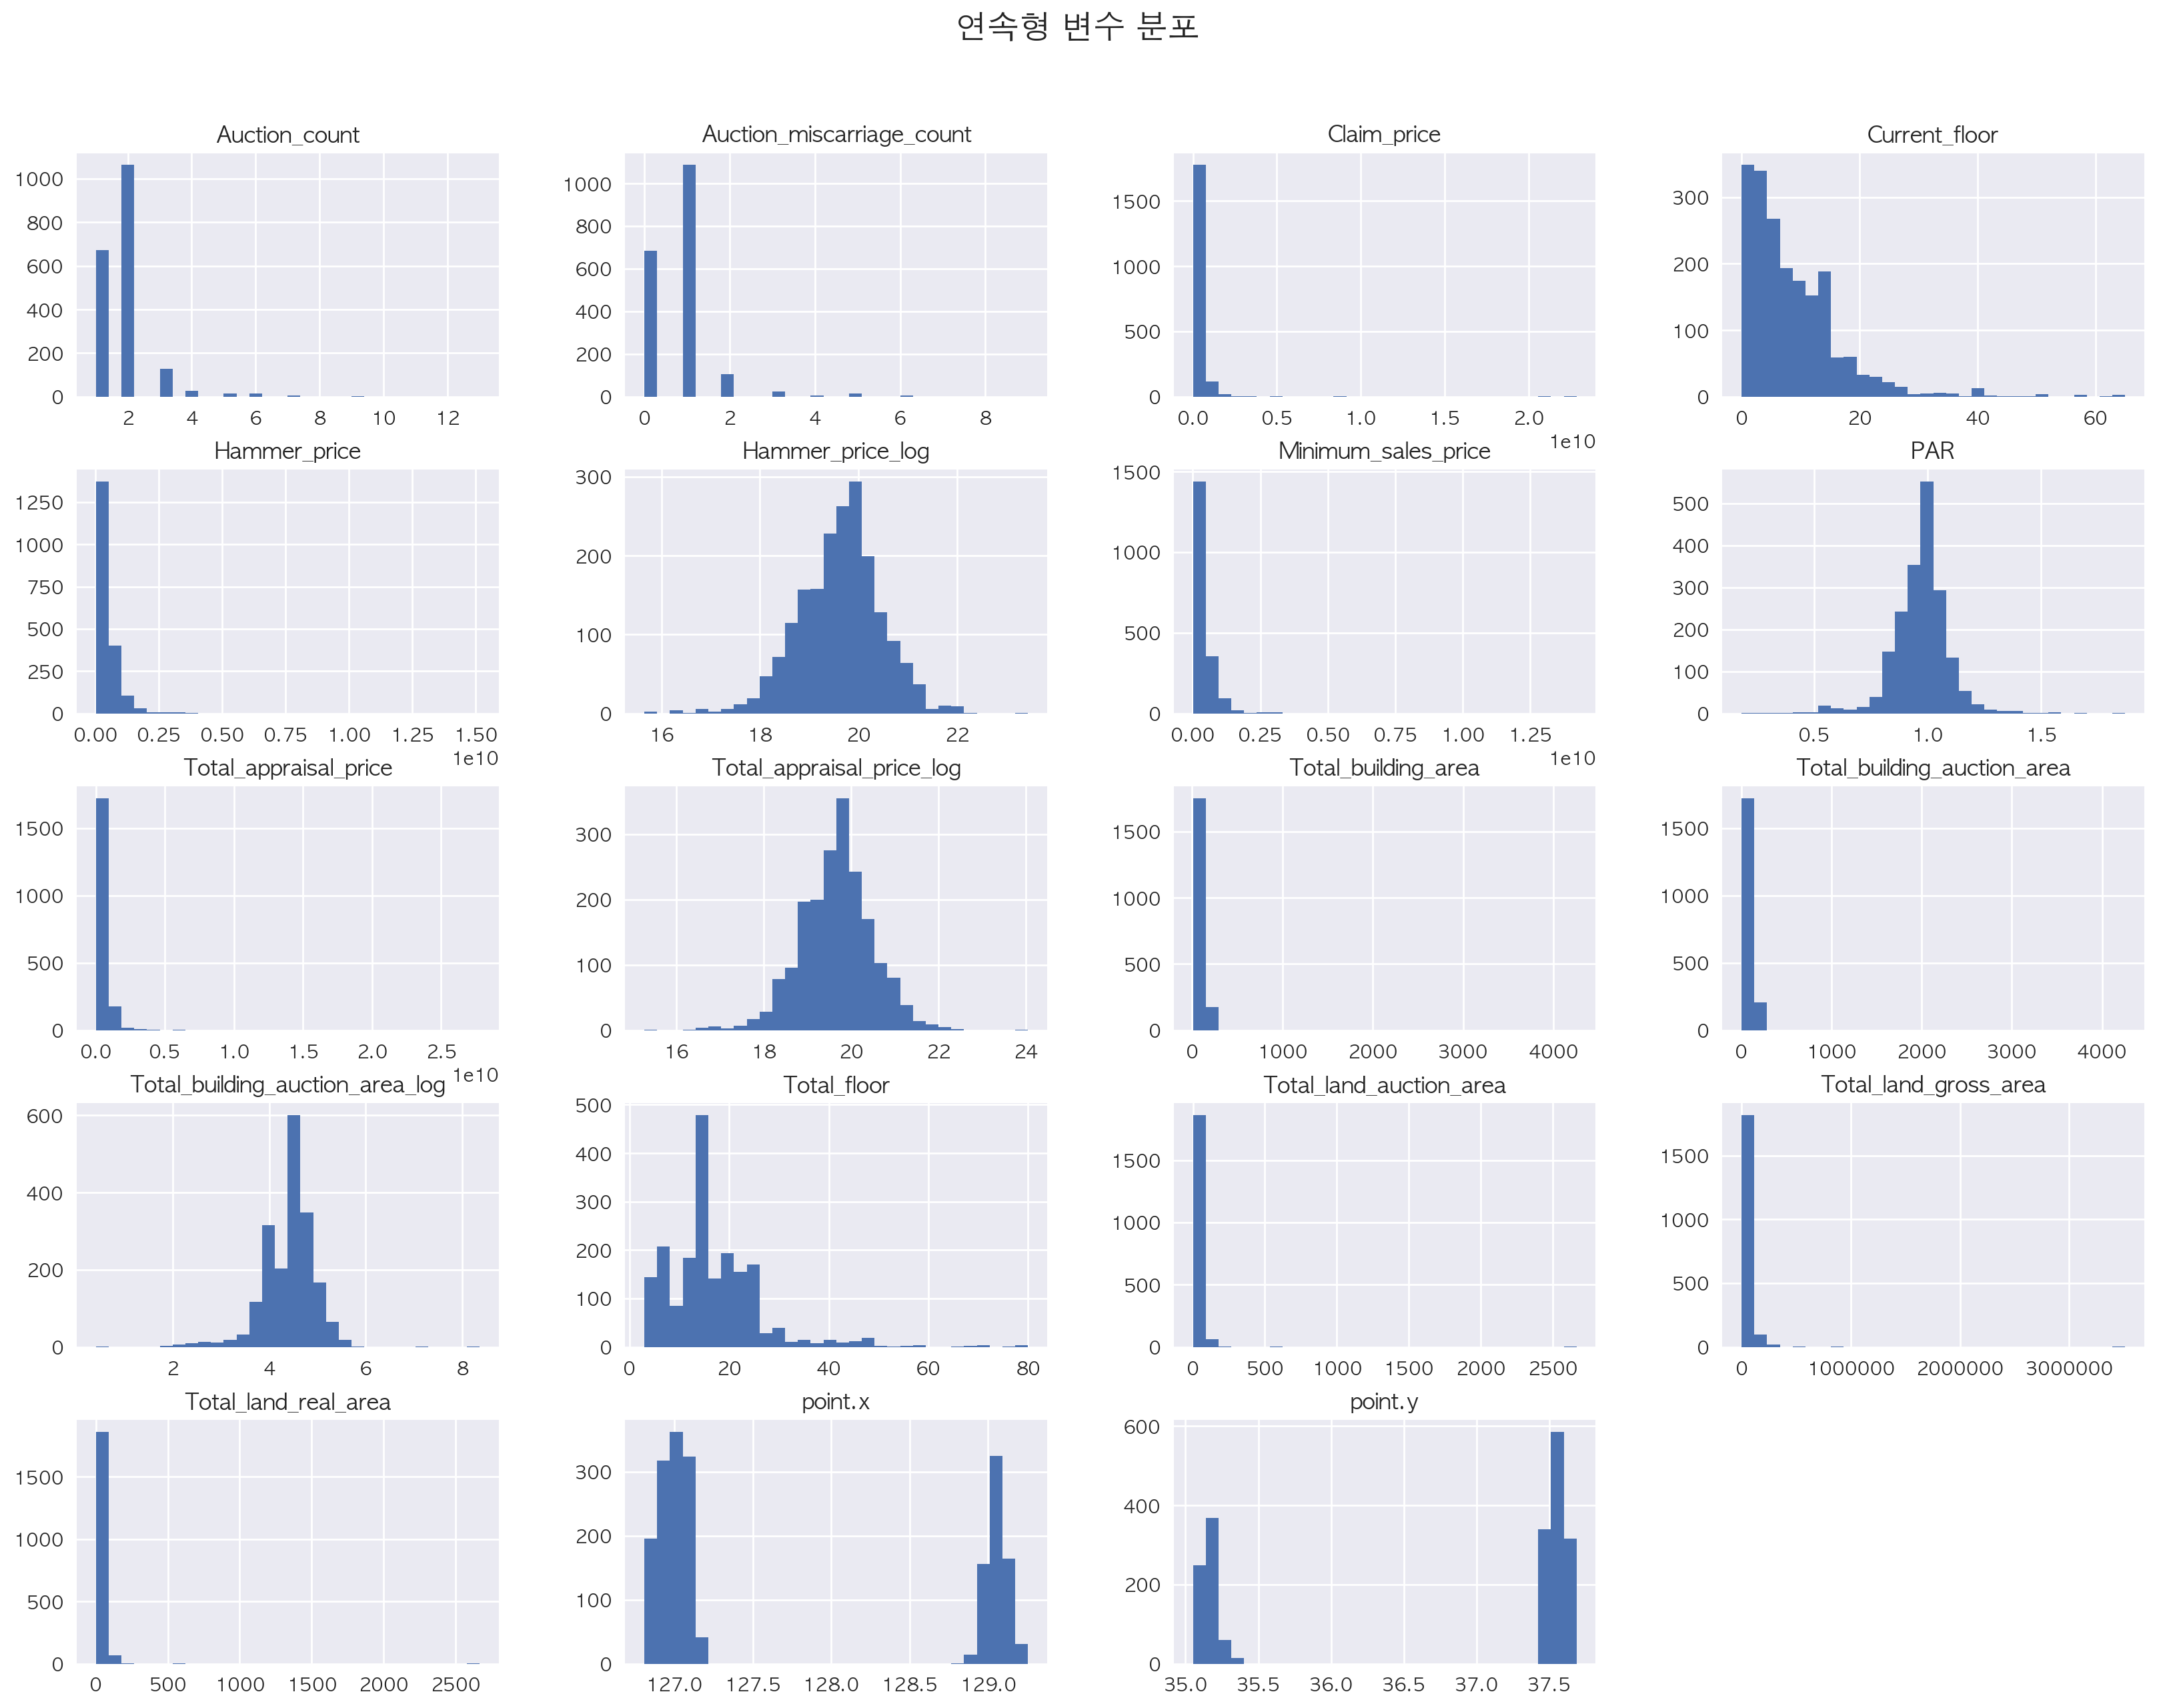

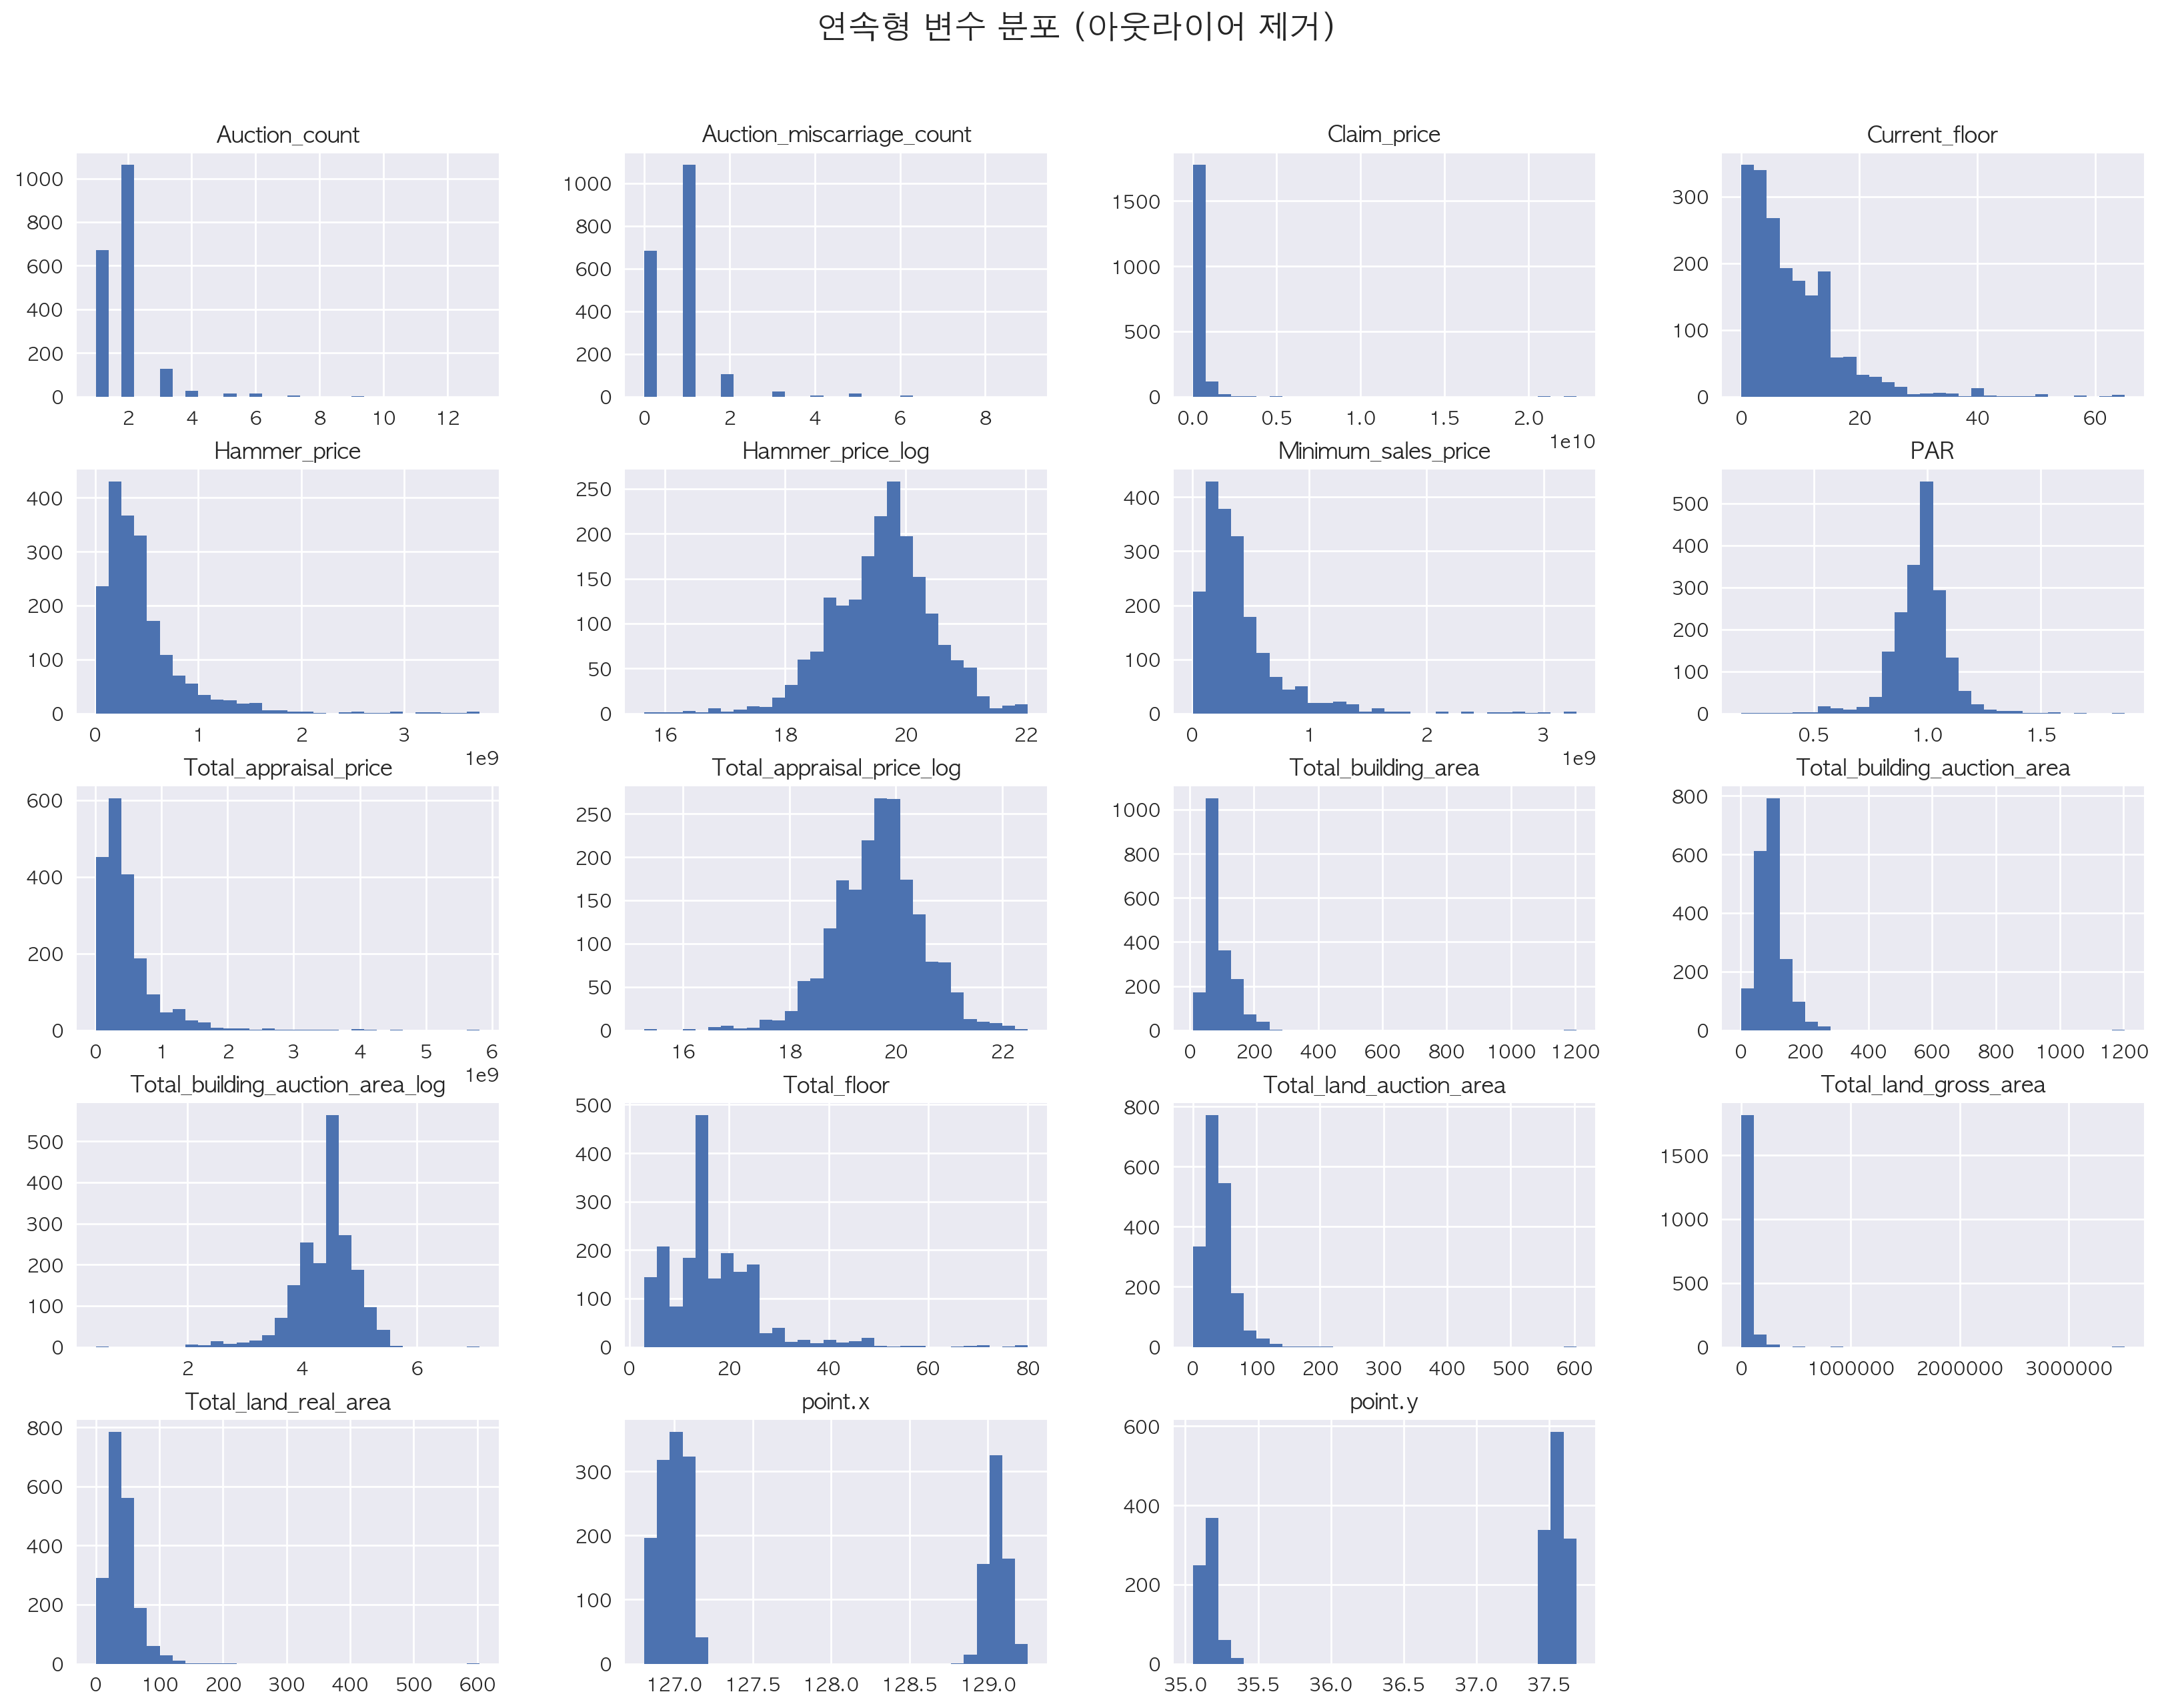

In [316]:
g = df.set_index('Auction_key').hist(bins=30,figsize=(20,15))
plt.suptitle("연속형 변수 분포", x=0.5, y=0.95, ha='center', fontsize='xx-large', fontweight=800)
plt.show()

# price 관련 데이터가 모두 왼쪽으로 매우 치우친 것을 완화하기 위해 가장 Hammer Price가 높은 아웃아리어 2개를 제외
df.sort_values('Hammer_price').iloc[:-2].set_index('Auction_key').hist(bins=30,figsize=(20,15))
plt.suptitle("연속형 변수 분포 (아웃라이어 제거)", x=0.5, y=0.95, ha='center', fontsize='xx-large', fontweight=800)
plt.show()

## 4) Target 변수와 관련 있거나, 유의미한 Insight를 얻을 수 있는 시각화를 5개 이상 해주세요 (subplot활용) <br> + B. 위에서 도출된 시각화 + 번뜩이는 Insight를 바탕으로 유의미한 Feature를 10개 이상 생성해 주세요

### 4.0. 범주형 변수 분석

> 범주형 데이터 분석을 위해 먼저 dtype이 object인걸로 추린 후 describe를 통해 전체적인 특징을 파악해본다. <br>
> unique를 통해 범주가 몇개인지 파악하고 top과 freq를 통해 최빈값이 어느정도 비율을 차지하는지 알 수 있다.

In [104]:
# df[df.columns[df.dtypes.map(lambda x: x=='object')]].describe().transpose()

|                      |   count |   unique | top                    |   freq |Analysis|
|:---------------------|--------:|---------:|:-----------------------|-------:|:------|
| **Auction_class**       |    1933 |        2 | 임의                   |   1439 |2가지 범주지만, 임의가 거의 대다수|
| **Bid_class**          |    1933 |        3 | 일반                   |   1796 |3가지이며 일반이 약 90%를 차지|
| Appraisal_company    |    1933 |      238 | 부경감정               |     33 |238개의 감정사로 매우 많이 분포|
| Final_result         |    1933 |        1 | 낙찰                   |   1933 |모두 낙찰된 것으로 없어도 될 데이터|
| Creditor             |    1933 |      448 | Private                |    483 |채권자, 매우 다양|
| **addr_do**              |    1933 |        2 | 서울                   |   1242 |서울과 부산으로 나뉘어지며 약 3대2의 비율|
| **addr_si**              |    1933 |       39 | 노원구                 |    129 |39개의 구로, 서울과 부산에 중복으로 있는 중구와 강서구를 고려하면 총 41개의 unique한 구가 존재|
| addr_dong            |    1933 |      285 | 상계동                 |     52 |285개 동으로 구성|
| addr_li              |      23 |        9 | 모전리                 |     10 |리가 존재하는 경우에만|
| addr_san             |    1933 |        2 | N                      |   1912 |산, 거의 없다.|
| addr_etc             |    1933 |     1929 | 1층 101호              |      3 |상세 주소|
| **Apartment_usage**     |    1933 |        2 | 아파트                 |   1656 |아파트와 주상복합으로 나뉘어짐|
| Preserve_regist_date |    1933 |     1256 | 1111-11-11 00:00:00    |     43 |보존등기일, 원래라면 datetime64이지만 1111-11-11 같은 잘못된 타입으로 변환에 실패|
| Specific             |      64 |       55 | 1차감정: 220,000,000 |      5 |상세 정보, 주변 정보나 1차 감정가가 있다. 대부분 빈값|
| **Share_auction_YorN**   |    1933 |        2 | N                      |   1854 |지분 경매 여부, 79개가 Y|
| road_name            |    1933 |     1038 | 마포대로               |     33 |도로명, 없는 경우도 존재하기에 이 경우 동 단위 구분이 더 나을듯|
| Close_date           |    1933 |      389 | 2016-09-08 00:00:00    |     37 |종국 일자, Preserve_regist_date와 같은 특징|
| Close_result         |    1933 |        2 | 배당                   |   1921 |대부분 배당, 12개의 데이터에 대해 낙찰|


위 분석을 통해 unique가 적절하게 적고, freq가 고루 있는 데이터를 선정해보면
``` 
Auction_class 
Bid_class
addr_do
addr_si
Apartment_usage
Share_auction_YorN
```
정도로 볼 수 있다.



### 4.1 ~ 4.5 시각화 + Feature 생성

#### 4.1 `Hammer_price`에서의 아웃라이어 + `Hammer_price_log` Feature 생성

> Hammer_price 분포에 심하게 영향을 끼치는 이상치를 탐지하고 이를 제거한 후, 더 개선하기 위한 Feature를 생성한다.

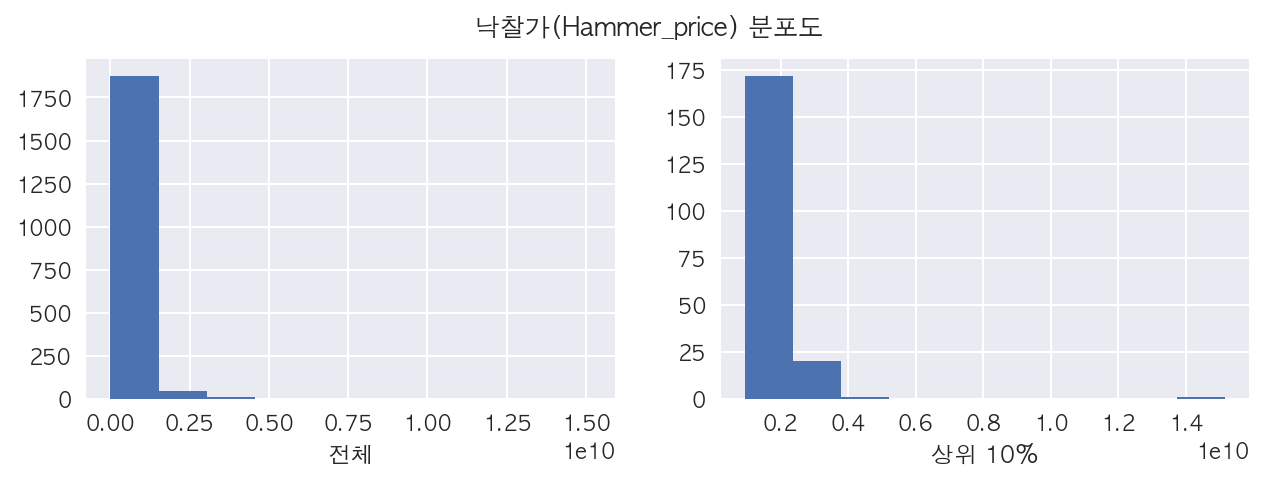

In [142]:
f, ax = plt.subplots(1,2)
ax[0] = plt.subplot(1,2,1)
# 낙찰가(Hammer_price) 전체에 대한 히스토그램
ax[0] = df.Hammer_price.hist(figsize=(10,3))
ax[0].set_xlabel('전체')
ax[1] = plt.subplot(1,2,2)
# 낙찰가(Hammer_price) 상위 10%에 대한 히스토그램
ax[1] = df.sort_values('Hammer_price').iloc[int(df.shape[0]*0.9):].Hammer_price.hist(figsize=(10,3))
ax[1].set_xlabel('상위 10%')
plt.suptitle("낙찰가(Hammer_price) 분포도")
plt.show()

위 그래프에서 볼 수 있듯 40억 이상, 150억 이상에서 하나씩 이상치가 존재해, **분포가 좌로 매우 치우친 모습**을 보인다. <br>
**이상치를 제거하여 그래프**를 그려보고 나아가 **로그를 통해 더 정규분포에 가깝게 변환**해본다.

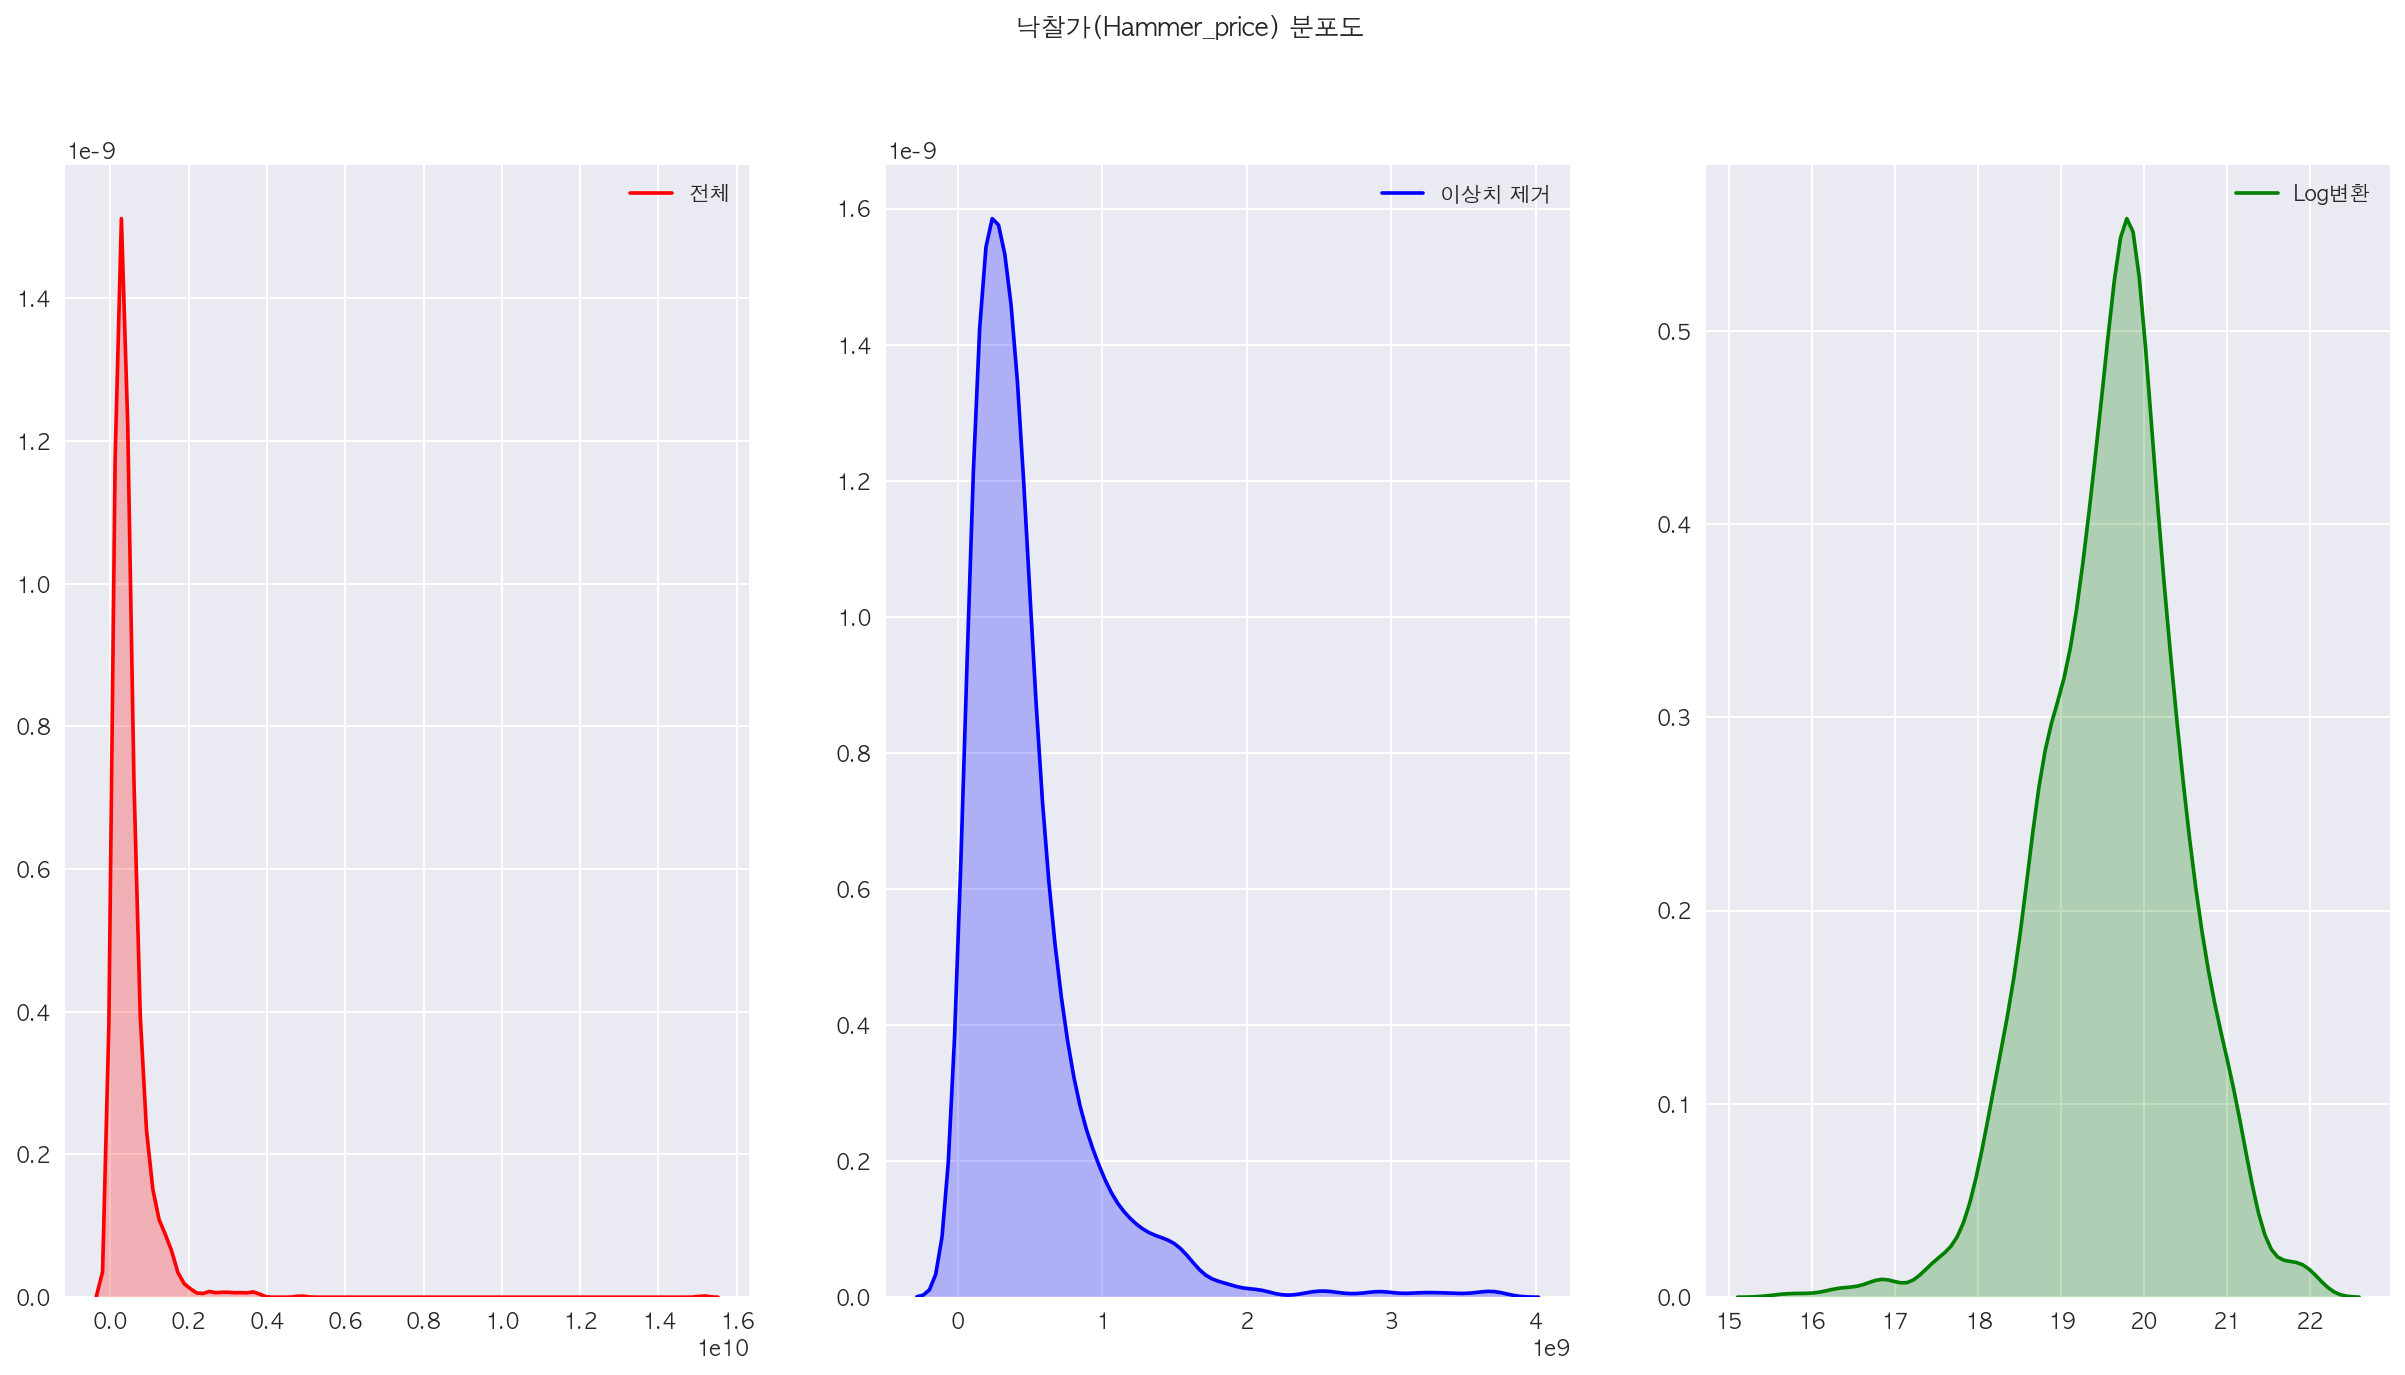

In [9]:
f, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(20,10))
ax[0] = plt.subplot(1,3,1)
# 낙찰가(Hammer_price) 전체에 대한 KDE Plot
ax[0] = sns.kdeplot(df.Hammer_price,color="red",shade=True)
ax[0].legend(['전체'])
ax[1] = plt.subplot(1,3,2)
# 낙찰가(Hammer_price) 아웃라이어 2개를 제거한 데이터에 대한 KDE Plot
ax[1] = sns.kdeplot(df.sort_values('Hammer_price')[:-2].Hammer_price,color="blue",shade=True)
ax[1].legend(['이상치 제거'])
ax[2] = plt.subplot(1,3,3)
# 낙찰가(Hammer_price) 아웃라이어 2개를 제거한 데이터에 로그 변환 후 KDE Plot
ax[2] = sns.kdeplot(df.sort_values('Hammer_price')[:-2].Hammer_price.transform(np.log),color="green",shade=True)
ax[2].legend(['Log변환'])
plt.suptitle("낙찰가(Hammer_price) 분포도")
plt.show()

위 시각화처럼 Hammer Price에 로그변환을 취했을 때 좀 더 정규분포에 가까운 모습을 보인다. 

그래서 다음과 같이 `Hammer_Price_log`란 새로운 Feature를 생성하였다.

In [10]:
df['Hammer_price_log'] =  df.Hammer_price.transform(np.log)

#### 4.2 `Total_appraisal_price` 와 `Hammer_price`에 대한 시각화 및 인사이트 + `낙찰가율(Hammer Price Ratio)`, `낙찰가율-지역` Feature 생성

> 상관관계 히트맵을 통해 `Total_building_auction_area` 와 `Hammer_price`의 매우 높은 상관성(1.0)을 확인할 수 있었다. <br>
> 실제 경매에서도 많이 사용되는 낙찰가율을 도입하고 이를 지역구별 평균 낙찰가율로 환산하여 낙찰가율이 높은 지역과 낮은 지역에 대한 Feature 또한 생성하였다.

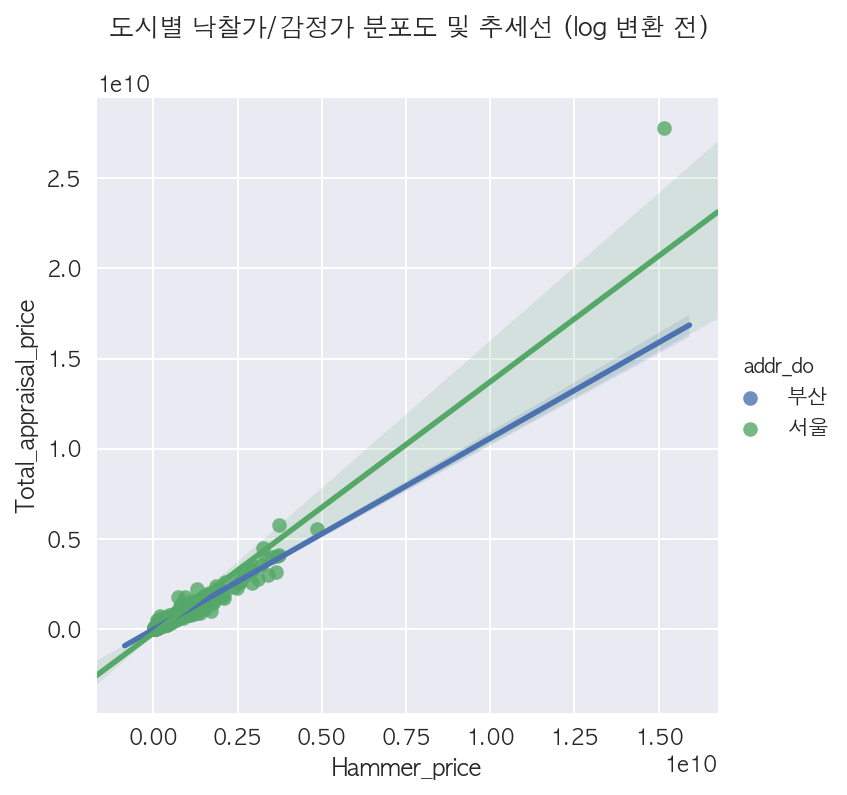

In [143]:
sns.lmplot(x='Hammer_price',y='Total_appraisal_price',hue='addr_do',data=df)
plt.suptitle("도시별 낙찰가/감정가 분포도 및 추세선 (log 변환 전)",x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

- 감정가의 로그 변환 Feature 생성

In [26]:
df['Total_appraisal_price_log'] = df.Total_appraisal_price.transform(np.log)

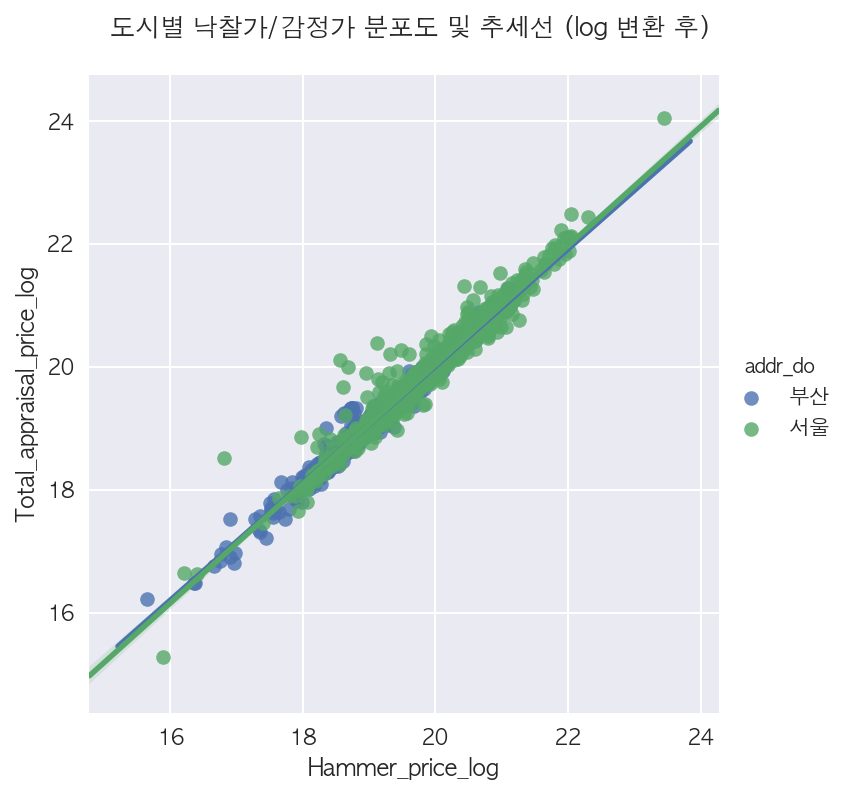

In [25]:
sns.lmplot(x='Hammer_price_log',y='Total_appraisal_price_log',hue='addr_do',data=df)
plt.suptitle("도시별 낙찰가/감정가 분포도 및 추세선 (log 변환 후)",x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

확실히 log 변환 후 감정과와 낙찰가 간의 선형 관계가 뚜렷하게 보이는 것을 확인할 수 있다.<br>
**실제 경매에서도 감정가 대비 90% 미만으로 낙찰 받아야 성공적이며 그 이상일 경우에는 감정가보다 높은 집값 상승에 대한 기대**가 있다는 뜻이라고 한다.<br>
그러므로 낙찰가율을 구하고 **어떤 지역이 감정가 대비 높은 집값 상승이 기대되고 있는지를 시각화**를 통해 알아내어 새로운 Feature를 위한 힌트를 얻고자 한다.

- 낙찰가율 HPR (Hammer Price Ratio) Feature 생성

In [27]:
df['HPR'] = df.Hammer_price / df.Total_appraisal_price

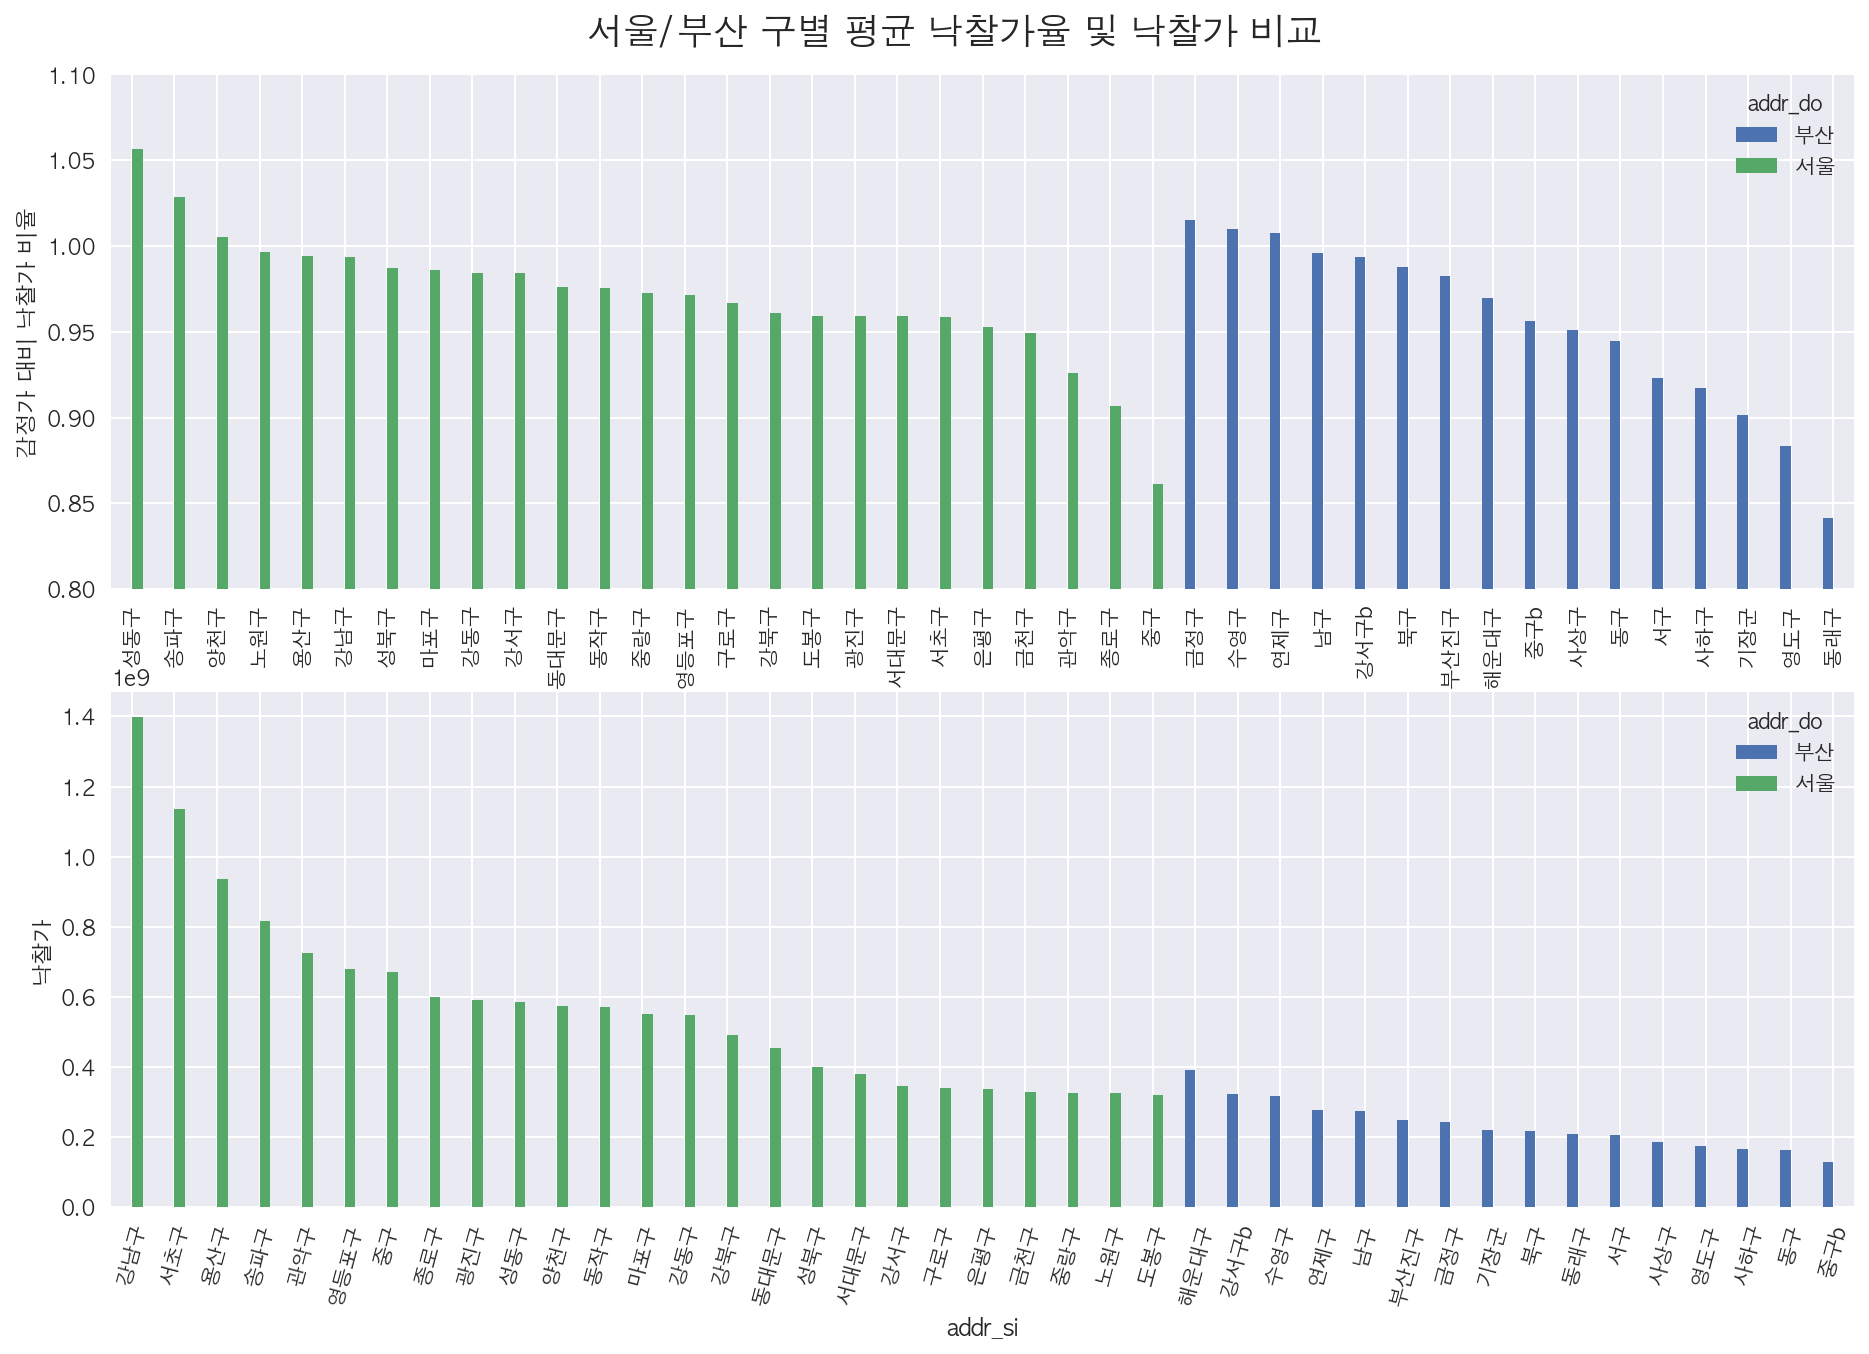

In [241]:
# 서울/부산 구별 평균 낙찰가율 및 낙찰가 비교 그래프 Plotting
f, (ax1, ax2) = plt.subplots(2, figsize=(15,10))
plt.suptitle("서울/부산 구별 평균 낙찰가율 및 낙찰가 비교", x=0.5, y=0.92, ha='center', fontsize='xx-large', fontweight=800)
df.pivot_table('HPR','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot.bar(ax=ax1, ylim=(0.8,1.1))
plt.xticks(rotation=75)
ax1.set_ylabel("감정가 대비 낙찰가 비율")
df.pivot_table('Hammer_price','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot.bar(ax=ax2)
plt.xticks(rotation=75)
ax2.set_ylabel("낙찰가")
plt.show()

확실히 평균 낙찰가는 강남, 서초, 용산, 송파가 압도적으로 강세였다. 하지만 감정가 대비 낙찰가율로 봤을 때는 조금 다른 결과가 나왔다. <br>
바로 **서울의 '성동구','송파구','양천구' 그리고 부산의 '금정구','수영구','연제구'에서 1.0이 넘는 낙찰가율**이 나왔고 이는 이 6개구의 미래 집값 상승에 대한 기대가 크며 경매에서의 경쟁이 치열했음을 알 수 있다. <br>
이러한 사실을 바탕으로 `High_price_si`와 `High_HPR_si`란 Bool값을 가진 Feature를 만들었다.

In [39]:
df['High_price_si'] = df.addr_si.map(lambda x: x in ['강남구','서초구','용산구','송파구','해운대구'])
df['High_HPR_si'] = df.addr_si.map(lambda x: x in ['성동구','송파구','양천구','금정구','수영구','연제구'])

또한 강서구와 중구가 서울과 부산에 동시에 있지만 특히 중구가 서로 평균 낙찰가율과 평균 낙찰가에서 상당한 차이를 보여 이 둘을 구분해야할 필요가 있다.<br>
이는 강서구와 중구에 각각 부산일 경우 뒤에 'b'를 붙이는 것으로 전처리를 하였다. 코드는 아래와 같다.

In [45]:
df.loc[df.query('addr_do=="부산"&addr_si=="강서구"').index,'addr_si'] = "강서구b"
df.loc[df.query('addr_do=="부산"&addr_si=="중구"').index,'addr_si'] = "중구b"

그런 후 낮은 낙찰가율을 보이는 서울 종로구, 중구와 부산 영도구 동래구에 대해 
- `Low_HPR_si`란 Bool값을 가진 Feature 생성

In [144]:
df['Low_HPR_si'] = df.addr_si.map(lambda x: x in ['종로구','중구','영도구','동래구'])

#### 4.3 `Total_building_auction_area` 와 `Hammer_price`에 대한 시각화 및 인사이트 + `평당 가격(PPP)` Feature 생성 및 검증

> 상관관계 히트맵을 통해 `Total_building_auction_area` 와 `Hammer_price`의 매우 높은 상관성(0.8)을 확인할 수 있었다. <br>
> 이를 통해 그 둘의 관계를 나타내고, 아웃라이어에 대한 힌트를 얻고자 한다.

In [319]:
# 낙찰가 상위 10개의 시,구,총건물경매면적
df.sort_values('Hammer_price',ascending=False).head(10)[['addr_do','addr_si','Total_building_auction_area','Hammer_price']]

,addr_do,addr_si,Total_building_auction_area,Hammer_price
1521,서울,관악구,4255.07,15151000000
1515,서울,강남구,301.47,4863000000
1602,서울,서초구,196.80,3729990000
1212,서울,강북구,1203.76,3721000000
1153,서울,강남구,244.66,3663000000
1531,서울,강남구,210.10,3651999999
1876,서울,강남구,243.36,3515000000
1179,서울,강남구,145.05,3404900000
1755,서울,강남구,244.04,3351000000
1327,서울,강남구,244.22,3241200000


위에서 본 아웃라이어 중 하나인 **가장 낙찰가가 높은 데이터는 평수를 봤을 때 약 1290평 규모로 매우 큰 평수임을 알 수 있다.** <br>
즉 아웃라이어처럼 보인 것도 평수를 고려하면 아웃라이어가 아니였다. 이를 통해 **평당 가격** 라는 개념을 도입할 필요성을 알 수 있다.

- 먼저 `Total_building_auction_area`도 분포가 고르지 못해 로그 변환을 취하였다.

In [60]:
df['Total_building_auction_area_log'] = df.Total_building_auction_area.transform(np.log)

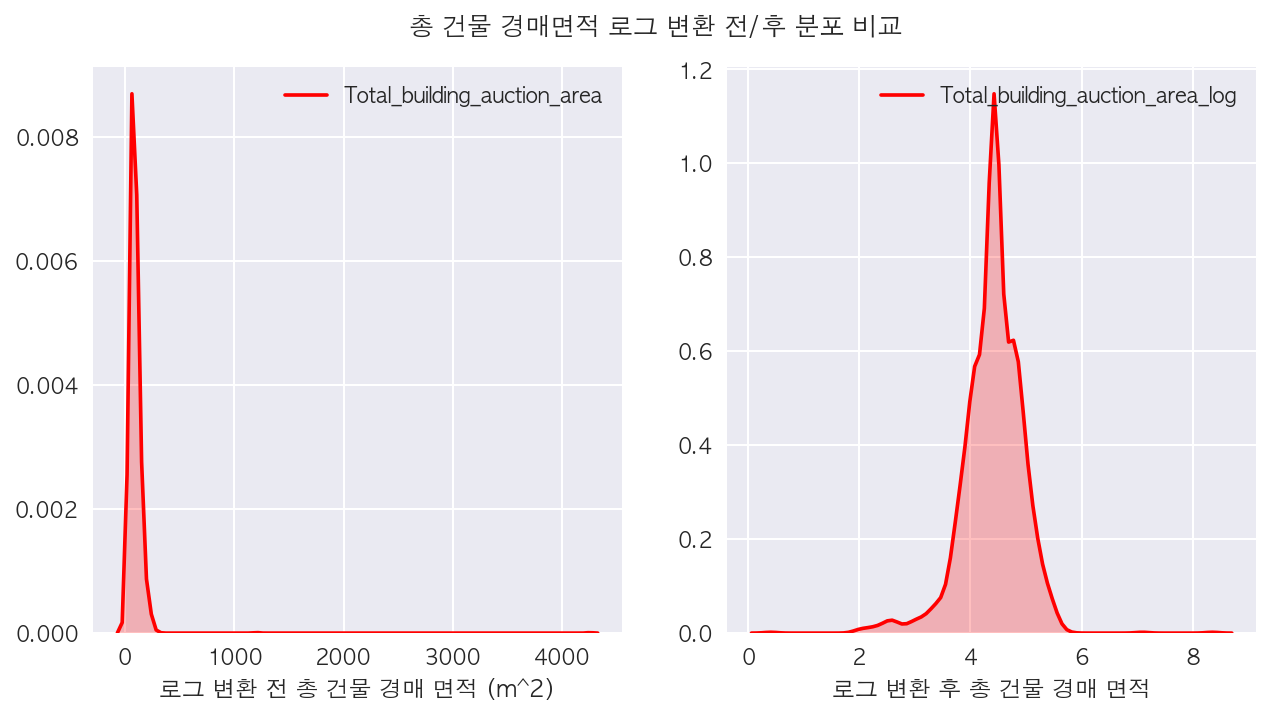

In [66]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(df.Total_building_auction_area,color="red",shade=True, ax=ax1)
ax1.set_xlabel("로그 변환 전 총 건물 경매 면적 (m^2)")
sns.kdeplot(df.Total_building_auction_area_log,color="red",shade=True, ax=ax2)
plt.suptitle("총 건물 경매면적 로그 변환 전/후 분포 비교", x=0.5, y=0.95, ha='center', fontsize='large', fontweight=800)
plt.xlabel("로그 변환 후 총 건물 경매 면적")
plt.show()

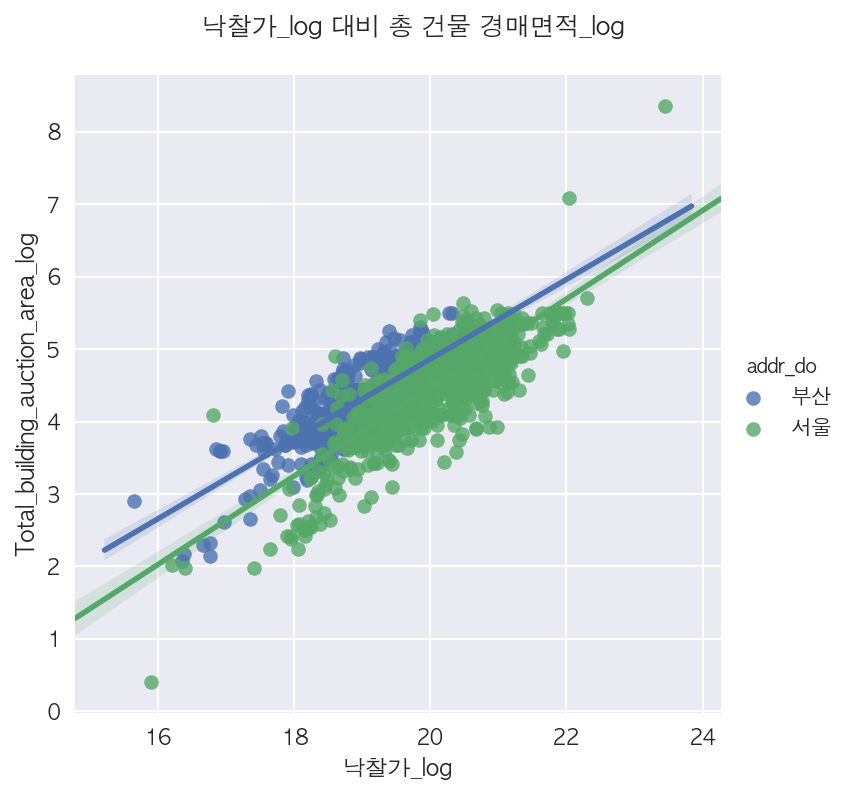

In [72]:
sns.lmplot(x='Hammer_price_log',y='Total_building_auction_area_log',hue='addr_do',data=df)
plt.suptitle("낙찰가_log 대비 총 건물 경매면적_log", x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.xlabel("낙찰가_log")
plt.show()

낙찰과와 경매면적 간의 선형관계가 뚜렷하지만 그럼에도 가격의 기준을 Target Value인 낙찰가로 할 순 없기에 높은 상관관계를 보인 감정가를 기준으로 하여 **평당 가격 Feature**를 생성하였다. <br>
여기서 평당 가격는 3.3 m^2 단위별 감정가 가격으로 하였다. **Feature 이름은 `PPP` = Price per Pyeong 으로 하였다.**

In [300]:
# 평당 가격 생성 코드
df['PPP'] = df.Total_appraisal_price / (df.Total_building_auction_area / 3)

In [301]:
# 평당 가격 통계
df.PPP.describe()

count    1.933000e+03
mean     1.477859e+07
std      8.584818e+06
min      1.650165e+06
25%      9.067850e+06
50%      1.315354e+07
75%      1.776199e+07
max      7.227488e+07
Name: PPP, dtype: float64

평당 가격은 평균 1400만원에 최고 7000만원까지 올라간다. 특히 75% 구간까지 2000만원을 못넘는 것으로 보아 높은 평당 가격의 분포가 Sparse 함을 알 수 있다.

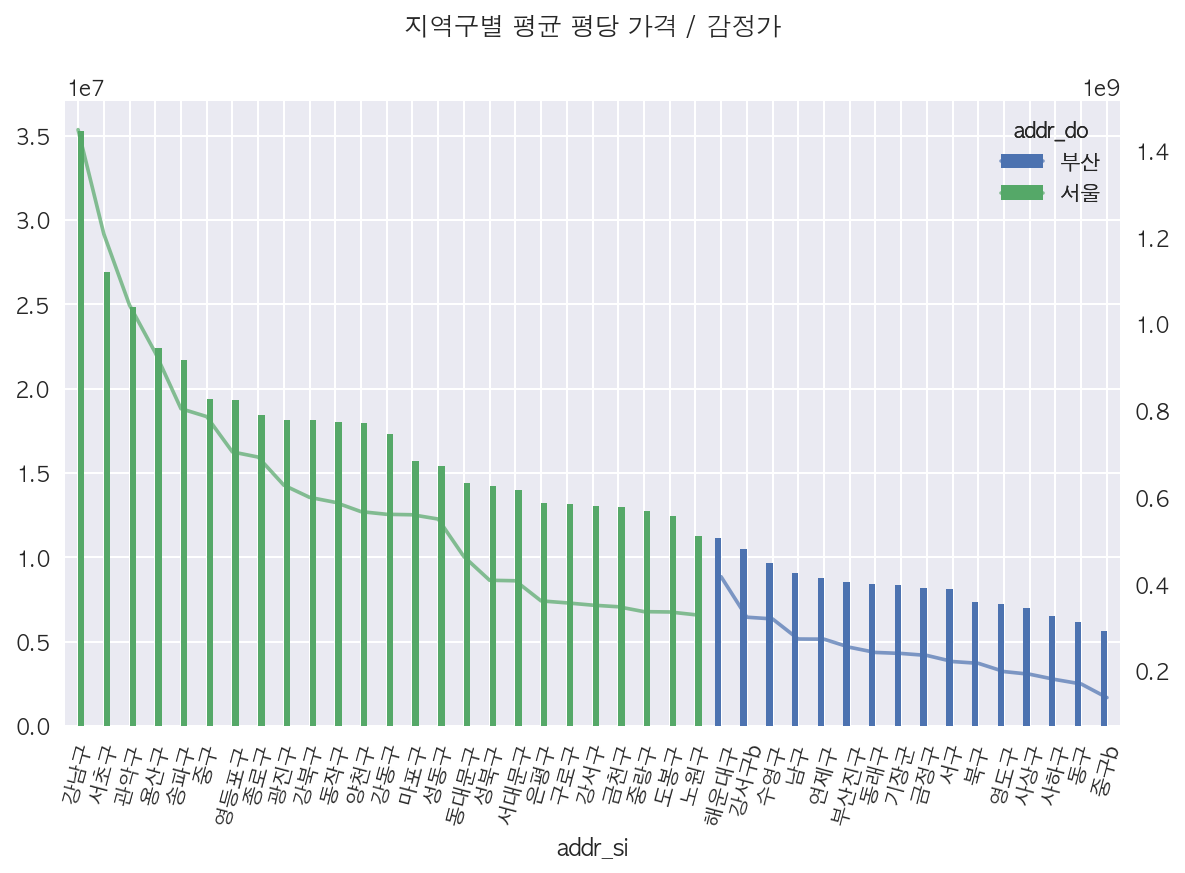

In [302]:
# 지역구별 평균 평당 가격 및 평균 감정가 그래프 그리기
f, ax2 = plt.subplots(1,1, sharex='all')
df.pivot_table('PPP','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot.bar(ax=ax2)
plt.xticks(rotation=75)
ax1 = ax2.twinx() 
df.pivot_table('Total_appraisal_price','addr_si','addr_do',aggfunc=np.mean).sort_values(['서울','부산'], ascending=False).plot(ax=ax1, alpha=0.7)
f.tight_layout()
plt.grid(False)
plt.suptitle("지역구별 평균 평당 가격 / 감정가", x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

지역구별 평균 평당 가격을 Bar로, 평균 감정가를 Line으로 나타낸 그래프다. <br>
평균 감정가와는 다르게 보인 평당 가격만의 가장 큰 특징은 **해운대구**에 있다. 다른 구는 감정가 순서(Line)와 평당 가격(Bar)도 비슷하게 흘러간 반면 <br>
해운대구는 평균 낙찰가에선 서울의 동대문구와 비슷한 위치였다면 평당 가격에선 서울의 노원구와 비슷한 수준을 보인다.<br>
**즉 해운대구는 평당 가격이 서울보다 거의 낮음에도 높은 평수의 집이 많아 낙찰가 자체가 올라갔다는 분석이 가능하다.** 

-------

> 지역별 특성을 더 직관적으로 파악하기 위해 위도 경도 데이터를 이용한 지도 시작화를 진행하였습니다.
>
> 다만 자바스크립트 기반으로 지도 API가 구현되어 일부 환경에선 지도가 보이지 않아 스크린샷으로 아래에 첨부하였습니다.

In [303]:
import folium
from folium.plugins import FastMarkerCluster, MarkerCluster

# folium 맵 초기 설정, 대한민국 전체 기준
folium_map = folium.Map(location=[36.5502, 126.982], zoom_start=7)
mc = MarkerCluster(name="Marker Cluster")
# 서울시 낙찰가 상위 100개 건물 기준
for key, row in df.query("addr_do=='서울'").sort_values('Hammer_price',ascending=False)[:100].iterrows():
    folium.CircleMarker(location=[row['point.y'], row['point.x']], radius= 10, popup="Price: {}".format(int(row['PPP'])),
                 color="green", fill=True).add_to(mc)    

mc.add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [304]:
folium_map = folium.Map(location=[36.5502, 126.982], zoom_start=7)
mc = MarkerCluster(name="Marker Cluster")
# 서울시 평당 가격 상위 100개 건물 기준
for key, row in df.query("addr_do=='서울'").sort_values('PPP',ascending=False)[:100].iterrows():
    folium.CircleMarker(location=[row['point.y'], row['point.x']], radius= 10, popup="Price: {}".format(int(row['PPP'])),
                 color="green", fill=True).add_to(mc)    

mc.add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [305]:
folium_map = folium.Map(location=[36.5502, 126.982], zoom_start=7)
mc = MarkerCluster(name="Marker Cluster")
# 서울시 평당 가격 하위 100개 건물 기준
for key, row in df.query("addr_do=='서울'").sort_values('PPP',ascending=True)[:100].iterrows():
    folium.CircleMarker(location=[row['point.y'], row['point.x']], radius= 10, popup="Price: {}".format(int(row['PPP'])),
                 color="green", fill=True).add_to(mc)    

mc.add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [306]:
# import folium
# from folium.plugins import FastMarkerCluster, MarkerCluster

# folium_map = folium.Map(location=[36.5502, 126.982], zoom_start=7)
# mc = MarkerCluster(name="Marker Cluster")
# for key, row in df.query("addr_do=='부산'").sort_values('Hammer_price',ascending=False)[:50].iterrows():
#     folium.CircleMarker(location=[row['point.y'], row['point.x']], radius= 10, popup="Price: {}".format(int(row['PPP'])),
#                  color="green", fill=True).add_to(mc)    

# mc.add_to(folium_map)
# folium.LayerControl().add_to(folium_map)
# folium_map

|서울지역 낙찰가 상위 100개|
|---|
|![image.png](https://github.com/csy1204/Data_Science_Tobigs/raw/3c04de854f342aafaf0b5376b989f58ed360f82e/img1.png)|
|상위 100개 중 아웃라이어 처럼 보이는 건물의 평당 가격을 살펴보면 평균 정도에 머무르는 걸 확인할 수 있었다. 즉 평수가 클 뿐 평당 가격(PPP)은 주변 시세와 비슷하다는 해석이 가능하다.|

|서울지역 하위 100개|
|---|
|![image.png](https://github.com/csy1204/Data_Science_Tobigs/raw/3c04de854f342aafaf0b5376b989f58ed360f82e/img2.png)|
|마찬가지로 강남지역에서도 낙찰가 하위 100개가 보이는데 PPP를 보면 2000에서 3000만원 수준으로 단지 평수가 작을 뿐 높은 PPP를 보인다. 이를 통해 평당 가격이 지역별 특성을 반영하며 좀 더 지역별 명확한 분류를 할 수 있도록 해준다.|


|부산지역 낙찰가 상위 100개|하위 100개|
|---|---|
|![image.png](https://github.com/csy1204/Data_Science_Tobigs/raw/3c04de854f342aafaf0b5376b989f58ed360f82e/img3.png)|![image.png](https://github.com/csy1204/Data_Science_Tobigs/raw/3c04de854f342aafaf0b5376b989f58ed360f82e/img4.png)|


#### 4.4 `Current_floor` 와 `Hammer_price`에 대한 시각화 및 인사이트 + `층 분류 (Current_floor_type)` Feature 생성 및 검증

> 같은 아파트 내에서도 중요한 것은 바로 층이다. 부동산에서 주로 5층을 기준으로 저층부 / 중층부, 10층을 기준으로 중층부 / 고층부를 나눈다. (전체 20층 기준)
>
> 현재 층과 낙찰가의 상관 관계를 보고 층분류 Feature를 생성한 후에 각 층분류별 평균 낙찰가를 살펴본다.


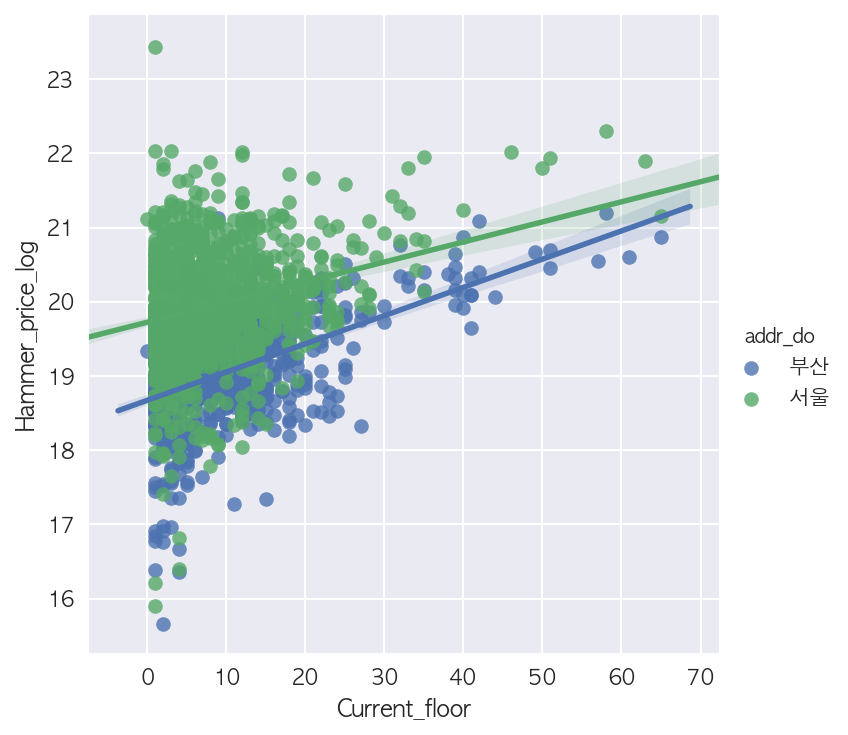

In [223]:
# 현재 층과 낙찰가_log의 상관 관계
sns.lmplot(y='Hammer_price_log',x='Current_floor',hue='addr_do',data=df)
plt.suptitle("", x=0.5, y=1.05, ha='center', fontsize='large', fontweight=800)
plt.show()

In [187]:
# 현재층 기술통계량
df.Current_floor.describe()

count    1933.000000
mean        8.817900
std         8.044644
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        65.000000
Name: Current_floor, dtype: float64

In [193]:
# 층분류 Feature 생성
df['Current_floor_type'] = df.Current_floor.map(lambda x: "고층부" if x >= 10 else ("중층부" if x >= 5 else "저층부"))

In [226]:
# 각 층분류 별 Row 갯수 -> 균일하게 분포하는 것을 알 수 있다.
df.Current_floor_type.value_counts()

고층부    691
저층부    689
중층부    553
Name: Current_floor_type, dtype: int64

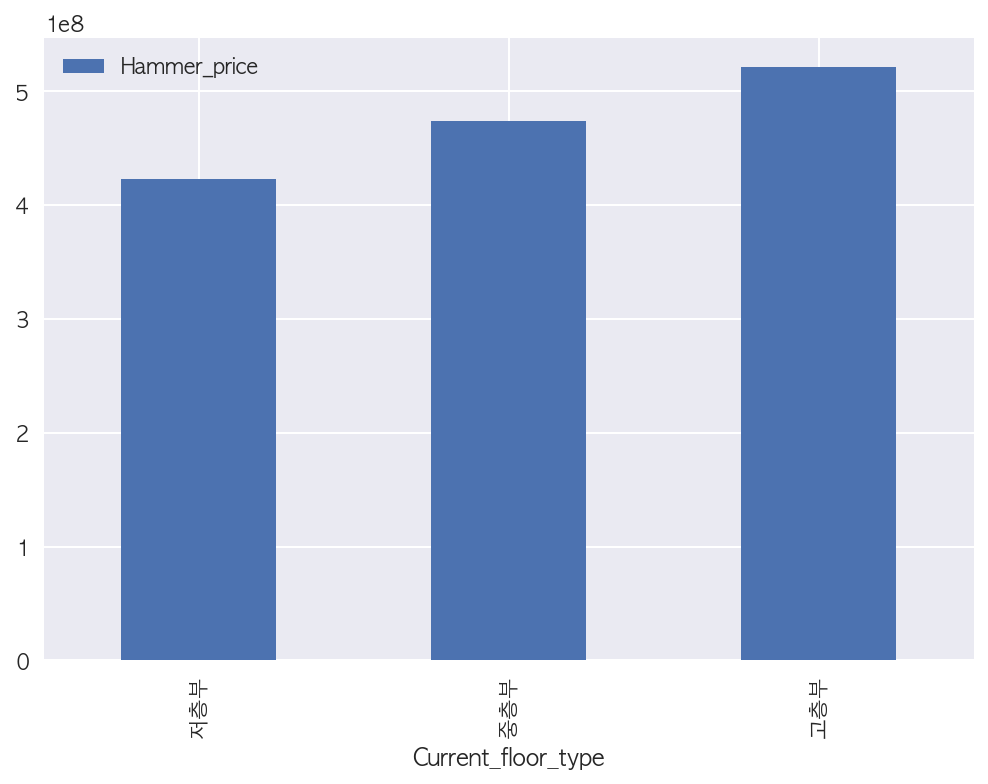

In [227]:
# 층분류별 평균 낙찰가 -> 고층부로 갈수록 평균이 높아지는 것을 확인할 수 있다.
df.pivot_table('Hammer_price','Current_floor_type',aggfunc=np.mean).sort_values("Hammer_price").plot.bar()
plt.show()

#### 4.5 `Hammer_price`의 시계열 특징 시각화 및 인사이트 + 시계열 관련 Feature 생성 및 검증

> 시간순이 있는 데이터이기에 날짜별 추이나 Seasonality 에 대한 체크는 필요하다.
>
> 만 2년만큼의 데이터라 월별 데이터에 대한 추이가 파악 가능하며, 좀 더 용이한 분석을 위해 시작 경매월, 최종 경매월, 최종경매년월 Feature를 생성하였다.

In [266]:
#  시작 경매월, 최종 경매월, 최종경매년월 Feature 생성
df['Final_auction_month'] = df.Final_auction_date.astype('datetime64').dt.month
df['First_auction_month'] = df.First_auction_date.astype('datetime64').dt.month
df['Final_auction_year_month'] = df.Final_auction_date.astype('datetime64').map(lambda x: x.strftime('%Y-%m'))

* 2016년 4월부터 2018년 3월까지의 평균 낙찰가 (Line) 및 경매 건수 (bar) 추이

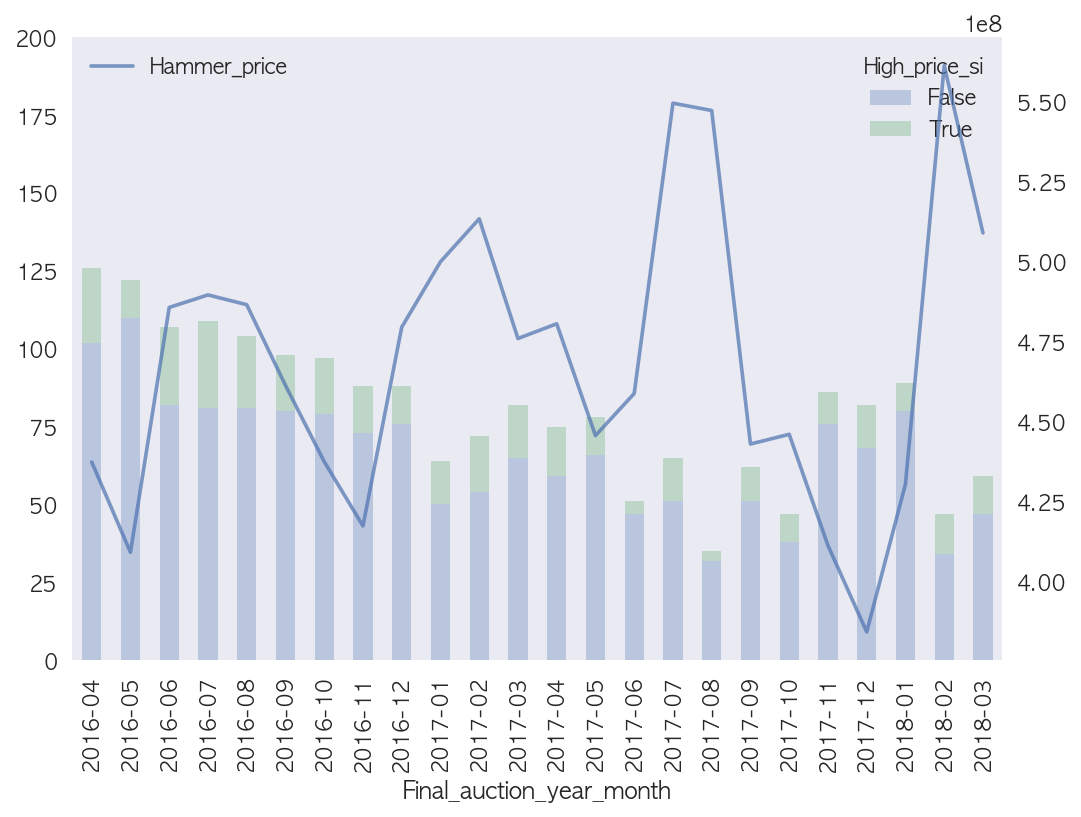

In [268]:
f, ax2 = plt.subplots(1,1, sharex='all')
df.pivot_table('Hammer_price','Final_auction_year_month','High_price_si',aggfunc="count").plot.bar(ax=ax2,ylim=(0,200), stacked=True, alpha=0.3)
# Multiple Y-Axis
ax1 = ax2.twinx() 
# 지나치게 높아 평균에 크게 영향을 끼치는 최고가 경매 2개 제거
df.sort_values('Hammer_price')[:-2].pivot_table('Hammer_price','Final_auction_year_month',aggfunc=np.mean).plot(ax=ax1, alpha=0.7)
ax1.grid(False)
ax2.grid(False)
plt.show()

대체적으로 `7~8월`, `2~3월`에 높은 평균 낙찰가가 형성되는 흐름을 알 수 있다. <br>
경매 공급과의 관계를 알기 위해 바 그래프로 전체 경매 건수를 표시하였고 초록색으로 고낙찰가 지역을 따로 표시하였다. <br>
**2017년 8월, 2018년 2월에 공급 자체가 줄어 높은 평균 낙찰가를 형성했다고 볼 수 있으며, 특히 전년도 대비 감소한 경매건수로 더 치열했을 것이라 예상할 수 있다.**<br>
하지만 2017년 12월의 매우 낮은 평균 낙찰가를 단순히 공급이 늘은 것으로 셞명하긴 힘들다.

- 추가적으로 요일 Feature를 추가하여 요일별 평균 낙찰가를 살펴보았다.

In [271]:
df['Final_auction_weekday'] = df.Final_auction_date.dt.weekday

In [294]:
from pandas.api.types import CategoricalDtype
# 숫자로 표현된 요일을 요일 이름으로 변환 및 카테고리로 변환
df.Final_auction_weekday = df.Final_auction_weekday.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri'}).astype(CategoricalDtype(['Mon','Tue','Wed','Thu','Fri']))

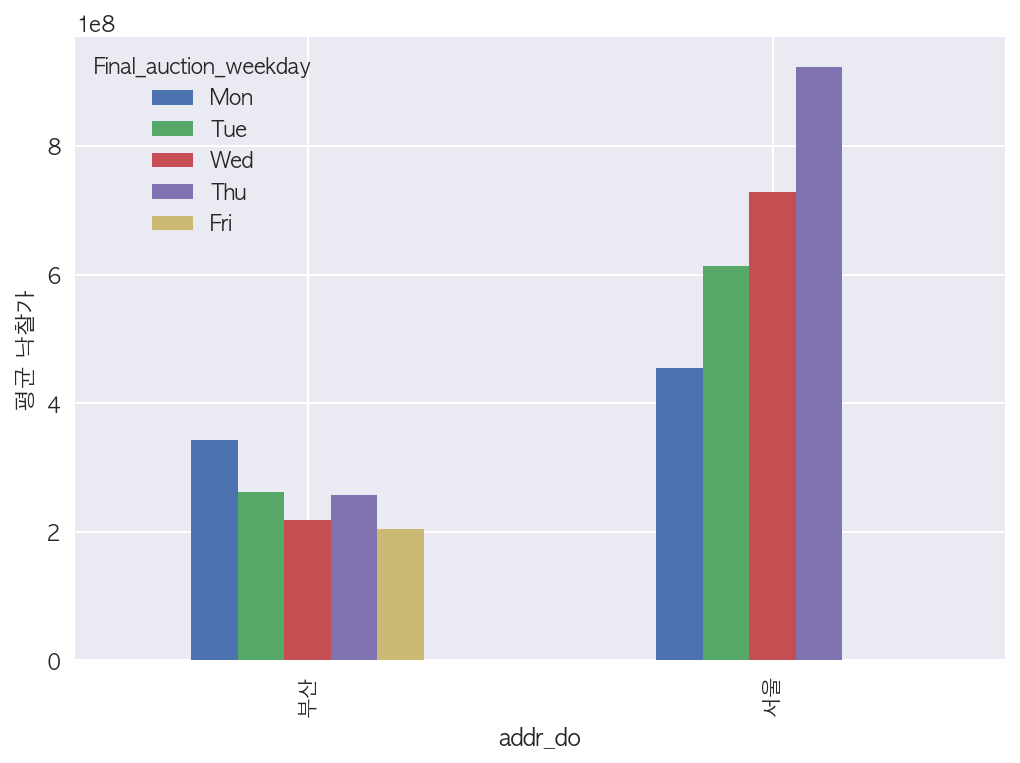

In [295]:
df.pivot_table('Hammer_price',['addr_do'],'Final_auction_weekday', aggfunc=np.mean).plot.bar()
plt.ylabel("평균 낙찰가")
plt.show()

위 그래프를 통해 서울은 금요일에 아예 경매를 진행하지 않으며, 월,화,수,목 순으로 낙찰가가 증가하는 모습을 보인다. <br>
이는 강남, 서초 지역 경매가 월요일에 열리지 않는다는 점이 주요하게 작용한 것으로 보인다.

In [297]:
# df.pivot_table('Hammer_price',['addr_do','addr_si'],'Final_auction_weekday', aggfunc='count')

## 5. Feature 정리

분석 과정에서 총 13개의 Feature를 생성하였고, 그 항목은 아래와 같습니다.

```
'Hammer_price_log', 
'Total_appraisal_price_log', 
'HPR', 
'High_price_si', 
'Low_HPR_si',
'High_HPR_si',
'Total_building_auction_area_log', 
'PPP', 
'Final_auction_month',
'First_auction_month',
'Final_auction_year_month',
'Current_floor_type',
'Final_auction_weekday'
```

In [252]:
# f, ax2 = plt.subplots(1,1, sharex='all')
# ax1 = ax2.twinx() 
# ax3 = ax2.twinx() 
# # df.pivot_table('Hammer_price','Final_auction_year_month',aggfunc=np.mean).plot(colormap="autumn", ax=ax1, alpha=0.7)
# df.sort_values('Hammer_price')[:-50].pivot_table('PPP','Final_auction_year_month',aggfunc=np.mean).plot(ax=ax1, alpha=0.7)
# df.sort_values('Hammer_price')[:-50].pivot_table('Hammer_price','Final_auction_year_month',aggfunc=np.mean).plot(ax=ax3, alpha=0.7)
# ax1.grid(False)
# # df.sort_values('Hammer_price')[:-20].pivot_table('Hammer_price','Final_auction_year_month',aggfunc=np.mean).plot(colormap="Set2", ax=ax1, alpha=0.7)
# ax1.legend(['전체','최고가 2개 제거', '최고가 10개 제거'])
# df.pivot_table('Hammer_price','Final_auction_year_month','High_price_si',aggfunc="count").plot.bar(ax=ax2,ylim=(0,200), stacked=True, alpha=0.3)
# f.tight_layout()
# ax2.grid(False)
# plt.show()